# SDS 203 Deep Learning Project 
IMT - Atlantique <br>
Brest, France <br>

Author : Raymond Klutse <br>
Date : 27th June , 2019


### Introduction

Text classification has become a very important part of Natural Language Processing. It is often used for Sentiment Analysis and Identification of harmful messages on social media networks such as Twitter and Facebook. Achieving this aim is quite difficult hence the numerous researches on going in this subject area. This project is a final semester project for SDS 203 Deep Learning at IMT - Atlantique, based on an article by Zhang et al on [Character-level Convolutional Networks for Text Classification](https://papers.nips.cc/paper/5782-character-level-convolutional-networks-for-text-classification.pdf) , where convolutional networks were used to extract information from text data. Application of CNN to text is often done at the word level where words are vectorised in order for them to be fed into a neural network for training. In this article, Zhang et al propose vectorisation of text at the character level instead of the word level. This allows the CNN to gain more insight about the data. Also,this CNNN does not require any prior knowledge of the words used to train the networks.  <br> The implementation of this project follows a [CRISP-DM](https://docs.oracle.com/cd/B19306_01/datamine.102/b14339/5dmtasks.htm) Methodology for data mining.<br> 


### Business Understanding

The aim of this project is to implement a Convolutional Neural Network for Text Classification. The model trained should be able to classify new data into one of two classes.

###  Data Understanding

We will first import the necessary libraries that will be to understand and explore the data. Data used to implement the solution provided in the article  is available on [Amazon Reviews for Sentiment Analysis](https://www.kaggle.com/bittlingmayer/amazonreviews). Data available from amazon reviews is divided into train and test data. We will first load both datasets into different dataframes using pandas. A label _label__1  represents a negative review while _label__2 represents a positive review.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Read train dataset
train = pd.read_csv('amazonreviews/train.ft.txt',delimiter="\n",header=None)
print("Train dataset shape : ",train.shape)
train.head()

Train dataset shape :  (3600000, 1)


,0
0,__label__2 Stuning even for the non-gamer: Thi...
1,__label__2 The best soundtrack ever to anythin...
2,__label__2 Amazing!: This soundtrack is my fav...
3,__label__2 Excellent Soundtrack: I truly like ...
4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [3]:
#Read test dataset
test = pd.read_csv('amazonreviews/test.ft.txt',delimiter="\n",header=None)
print("Test dataset shape : ",test.shape)
test.head()

Test dataset shape :  (400000, 1)


,0
0,__label__2 Great CD: My lovely Pat has one of ...
1,__label__2 One of the best game music soundtra...
2,__label__1 Batteries died within a year ...: I...
3,"__label__2 works fine, but Maha Energy is bett..."
4,__label__2 Great for the non-audiophile: Revie...


We observe from the dataframe that each row consists of a label and its respective review.

In the article, an alphabet set of 70 were used to represent characters in a text review. From observation, there was a duplicate of character '-' in the alphabet set , hence my implementation used 69 alphabets. We first prepare the alphabets that are going to be used in the model. Also, we will create functions to clean our text data and separated model from text review.

In [4]:
#Alphabets used for one hot encoding
ascii_lowercase = 'abcdefghijklmnopqrstuvwxyz'
digits = '0123456789'
punctuation = '-,;.!?:"/\|_\'@#$%^&*~`+=<>[](){}'
whitespace = '\n'

In [5]:
print(ascii_lowercase), print("Number of english letters :",len(ascii_lowercase))

print(digits), print("Number of digits :",len(digits))

print(punctuation), print("Number of punctuations :",len(punctuation))

print(whitespace), print("Number of whitespace :",len(whitespace))

abcdefghijklmnopqrstuvwxyz
Number of english letters : 26
0123456789
Number of digits : 10
-,;.!?:"/\|_'@#$%^&*~`+=<>[](){}
Number of punctuations : 32


Number of whitespace : 1


(None, None)

In [6]:
import itertools
alphabet = list(itertools.chain(ascii_lowercase,digits, punctuation , whitespace))
print("Size of alphabet :",len(alphabet))
alphabet[40:50]

Size of alphabet : 69


['!', '?', ':', '"', '/', '\\', '|', '_', "'", '@']

In [7]:
#method to clean up string data
import re
def clean_str(string):
    s = string.replace(" ", "")
    #s = re.sub(r"[\t]", "", string)
    return s.strip().lower()

In [8]:
#method to convert label into a binary value
def convertlabeltobinary(label):
    label = 0 if label == '__label__1' else 1
    return label

We now split our text into label and text and store it in a dataframe

In [9]:
train = train.loc[:,0].str.split(' ', 1)
train.head()

0    [__label__2, Stuning even for the non-gamer: T...
1    [__label__2, The best soundtrack ever to anyth...
2    [__label__2, Amazing!: This soundtrack is my f...
3    [__label__2, Excellent Soundtrack: I truly lik...
4    [__label__2, Remember, Pull Your Jaw Off The F...
Name: 0, dtype: object

In [10]:
train = pd.DataFrame(list(train),columns = ['label','text'])

In [11]:
from sklearn.utils import shuffle
train= shuffle(train)
train = train.reset_index(drop=True)
train.head()

,label,text
0,__label__2,fun toy for 9 month old: my 9 month old loves ...
1,__label__1,.:Fun.. for about 20 mins..:.: Dont get me wro...
2,__label__1,"This is not ""Deluxe"" nor does it work: The ""De..."
3,__label__1,Never worked: I followed the instructions to i...
4,__label__2,Pretty darn good stuff: Well first of all this...


We then read the label column and apply the binary function to it. 

In [12]:
train_label = train.loc[0:30000,'label'].apply(lambda x:convertlabeltobinary(x))
train_label = train_label.reset_index(drop=True)
train_label = pd.DataFrame(train_label)

In [13]:
print("Train label dataset shape : ",train_label.shape)
train_label.head()

Train label dataset shape :  (30001, 1)


,label
0,1
1,0
2,0
3,0
4,1


In [14]:
train_label.label.value_counts()

1    15049
0    14952
Name: label, dtype: int64

We now read the text column and apply the clean function to it.

In [15]:
train_text = train.loc[0:30000,'text'].apply(lambda x:clean_str(x))
train_text = train_text.reset_index(drop=True)
train_text = pd.DataFrame(train_text)

In [16]:
print("Train text dataset shape : ",train_text.shape)
train_text.head()

Train text dataset shape :  (30001, 1)


,text
0,funtoyfor9monthold:my9montholdlovespushingdown...
1,.:fun..forabout20mins..:.:dontgetmewrong..ilik...
2,"thisisnot""deluxe""nordoesitwork:the""deluxe""came..."
3,neverworked:ifollowedtheinstructionstoignoreth...
4,prettydarngoodstuff:wellfirstofallthisisoneoft...


In order for the network to function properly, we need to feed it numeric data. In view of this, we vectorise our text data. [One hot encoding](http://www.insightsbot.com/blog/zuyVu/python-one-hot-encoding-with-pandas-made-simple) is applied on characters in the alphabet set where the length of each encoded character is the length of the alphabet ,which in our case is 69. <br>
In order for the model to capture enough insight from the data, the data samples must be of equal sizes. The maximum length of a review text is 1014. In order to acheive this, we pad all text reviews that are lower than this number with zeros.


In [17]:
#method to create padding vector
def zerolistmaker(n):
    listofzeros = [0] * n
    return listofzeros

In [18]:
#method to pad vector
def pad_vector(vector):
    while len(vector) < 1014 : vector.append(zerolistmaker(69))
    return vector

In [19]:
#method to vectorise text
import string
def string_vectorizer(string):
    vector = [[0 if char != letter else 1 for char in alphabet ] for letter in string]
    #vector = pd.get_dummies(pd.Series(list(string)).astype('category', categories=alphabet)).values.tolist()
    vector = pad_vector(vector)
    return np.asarray(vector)

We now vectorise out text using one hot encoding.

In [20]:
train_text_vec = train_text.loc[0:,'text'].apply(lambda x : string_vectorizer(x))
train_text_vec = pd.DataFrame(train_text_vec)

In [21]:
print("Train text vector shape : ",train_text.shape)
train_text_vec.head()

Train text vector shape :  (30001, 1)


,text
0,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


We store the vectorised train text and our binary label in a new data frame. We then split our train data into train and validation data (about 30% of training data)

In [22]:
train_numeric = pd.concat([train_label,train_text_vec], axis=1)
print("Train numeric shape : ",train_numeric.shape)
train_numeric.head()

Train numeric shape :  (30001, 2)


,label,text
0,1,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
4,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [23]:
#method to split train and validation 
def validation_train_split(train,validation_size):
    validation = train.iloc[validation_size:,:]
    validation = validation.reset_index(drop=True)
    train_size = validation_size -1
    train = train.iloc[0:train_size,:]
    return train,validation

In [24]:
train_numeric= shuffle(train_numeric)
train_numeric = train_numeric.reset_index(drop=True)

train_numeric,validation_numeric = validation_train_split(train_numeric,26001)
print("Train numeric shape : ",train_numeric.shape)
train_numeric.head()

Train numeric shape :  (26000, 2)


,label,text
0,0,"[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."
3,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,0,"[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [25]:
print("Validation numeric shape : ",validation_numeric.shape)
validation_numeric.head()

Validation numeric shape :  (4000, 2)


,label,text
0,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
2,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,..."
4,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


All the encoded text is stored in x_train for the network and their repsective labels are stored in y_train. The shape is in the form of (samples,sample rows, sample columns)

In [26]:
from keras.utils.np_utils import to_categorical
x_train = np.stack(train_numeric.loc[0:10000,'text'])
y_train = list(train_numeric.loc[0:10000,'label'])
#y_train = to_categorical(y_train)
print('X Training data shape:' ,x_train.shape)
print('Y Training data shape:',len(y_train))

Using TensorFlow backend.


X Training data shape: (10001, 1014, 69)
Y Training data shape: 10001


In [27]:
print("Validation numeric shape : ",validation_numeric.shape)
validation_numeric.head()

Validation numeric shape :  (4000, 2)


,label,text
0,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,..."
2,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,..."
4,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


All the encoded text is stored in x_validation for the network and their repsective labels are stored in y_validation. The shape is in the form of (samples,sample rows, sample columns)

In [28]:
x_validation = np.stack(validation_numeric.loc[0:2000,'text'])
y_validation = list(validation_numeric.loc[0:2000,'label'])
print('X Validation data shape:' ,x_validation.shape)
print('Y Validation data shape:',len(y_validation))

X Validation data shape: (2001, 1014, 69)
Y Validation data shape: 2001


We now prepare the test data by performing the same functions applied to the train and validation set.

In [29]:
test = test.loc[:,0].str.split(' ', 1)
test.head()

0    [__label__2, Great CD: My lovely Pat has one o...
1    [__label__2, One of the best game music soundt...
2    [__label__1, Batteries died within a year ...:...
3    [__label__2, works fine, but Maha Energy is be...
4    [__label__2, Great for the non-audiophile: Rev...
Name: 0, dtype: object

In [30]:
test = pd.DataFrame(list(test),columns = ['label','text'])

In [31]:
print("Test data shape : ",test.shape)
test= shuffle(test)
test = test.reset_index(drop=True)
test.head()

Test data shape :  (400000, 2)


,label,text
0,__label__2,"""The Karate Kid"" on a surfboard, only much bet..."
1,__label__1,Totally Worthless: This movie is totally stupi...
2,__label__1,Not the nicest tribute ever....: Not the nices...
3,__label__1,never received my shippment: the first time i ...
4,__label__2,Fantastic debut: Writer/Director/Lead Actor Za...


In [32]:
test_label = test.loc[0:3000,'label'].apply(lambda x:convertlabeltobinary(x))
test_label = test_label.reset_index(drop=True)
test_label = pd.DataFrame(test_label)

In [33]:
print("Test label shape : ",test_label.shape)
test_label.head()

Test label shape :  (3001, 1)


,label
0,1
1,0
2,0
3,0
4,1


In [34]:
test_text = test.loc[0:3000,'text'].apply(lambda x:clean_str(x))
test_text = test_text.reset_index(drop=True)
test_text = pd.DataFrame(test_text)

In [35]:
print("Test text shape : ",test_text.shape)
test_text.head()

Test text shape :  (3001, 1)


,text
0,"""thekaratekid""onasurfboard,onlymuchbetter:simi..."
1,totallyworthless:thismovieistotallystupidandno...
2,notthenicesttributeever....:notthenicesttribut...
3,neverreceivedmyshippment:thefirsttimeididntrec...
4,fantasticdebut:writer/director/leadactorzachbr...


In [36]:
test_text_vec = test_text.loc[0:,'text'].apply(lambda x : string_vectorizer(x))
test_text_vec = pd.DataFrame(test_text_vec)

In [37]:
print("Test text shape : ",test_text_vec.shape)
test_text_vec.head()

Test text shape :  (3001, 1)


,text
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
4,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [38]:
test_numeric = pd.concat([test_label,test_text_vec], axis=1)
print("Test numeric shape : ",test_numeric.shape)
test_numeric.head()

Test numeric shape :  (3001, 2)


,label,text
0,1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
3,0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,..."
4,1,"[[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [39]:
from keras.utils.np_utils import to_categorical
x_test = np.stack(test_numeric.loc[0:1000,'text'])
y_test = list(test_numeric.loc[0:1000,'label'])
#y_train = to_categorical(y_train)
print('X Test data shape:' ,x_test.shape)
print('Y Test data shape:',len(y_test))

X Test data shape: (1001, 1014, 69)
Y Test data shape: 1001


In [40]:
type(x_test)

numpy.ndarray

### Modeling

The neural network created is a 1D CNN. It consists of 6 layers of 1D Convolutional Layers having stride of 1 with layers 1,2 and 6 having a max pooling layer of pooling size of 3. Kernel size for the first 2 1D convolutional layers is 7 and 3 for the rest of the layers. Filter size for 1D convolutional layers is 256.The Convolutional layers are connected to fully connected layers of size 3 with 2 dropout layers in between them, each of them having a probabilty of 0.5. <br>
Optimization is performed on the model using stochastic gradient descent (SGD) with a batch of size of 256,momentum 0.9 and initial step size 0.01.

##### Building the Network

In [61]:
import keras
keras.__version__

'2.2.4'

In [42]:
from keras.activations import relu
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Embedding, Flatten, Dropout, concatenate
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.utils.vis_utils import model_to_dot

input_dim = x_train[0].shape
print('Input Shape :' ,input_dim)

Input Shape : (1014, 69)


In [43]:
model = Sequential()
input_layer = Input(shape = input_dim)

cov_1 = Conv1D(filters=256, kernel_size=7, strides=1,activation='relu')(input_layer)
pool_1= MaxPooling1D(pool_size=3)(cov_1)

cov_2 = Conv1D(filters=256, kernel_size=7,strides=1,activation='relu')(pool_1)
pool_2= MaxPooling1D(pool_size=3)(cov_2)

cov_3 =Conv1D(filters=256, kernel_size=3,strides=1,activation='relu')(pool_2)

cov_4 =Conv1D(filters=256, kernel_size=3,strides=1,activation='relu')(cov_3)

cov_5 =Conv1D(filters=256, kernel_size=3,strides=1,activation='relu')(cov_4)

cov_6 =Conv1D(filters=256, kernel_size= 3,strides=1,activation='relu')(cov_5)
pool_6= MaxPooling1D(pool_size= 3)(cov_6)

flat = Flatten()(pool_6)

dense_1 = Dense(1024, activation='relu')(flat)
drop_1 = Dropout(0.5)(dense_1 )

dense_2 = Dense(1024, activation='relu')(drop_1)
drop_2 = Dropout(0.5)(dense_2)

dense_3 = Dense(1, activation='sigmoid')(drop_2)

model = Model(inputs= input_layer,outputs=dense_3)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1014, 69)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1008, 256)         123904    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 336, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 330, 256)          459008    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 110, 256)          0         
_________________________________________________________________
conv1d_3 (Conv1D)    

The chosen loss function for this project is Binary Crossenthropy. This is because our model is based on predicting one of two classes, label 1 or label 2. Futher information about other loss functions can be found in [Loss function for binary classification](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/) <br>
Concercning the batch size, we observed in this article [On Large-Batch Training for Deep Learning: Generalization Gap and Sharp Minima](https://arxiv.org/pdf/1609.04836v1.pdf)that there is effect of batch size on the overall model accuracy. The article shows that having a large batch size decreases model accuracy. Batch size proposed were 64, 128, 256, 512, each of which have a different effect on the model's accuracy. Also,the article indicates that a very small batch size also doesn't have a positive effect on the model. In order to acheive maximum accuracy, I chose a batch size of 256 which is not too big neigther is it too small.

In [45]:
from keras.optimizers import SGD, Adam
learning_rate = 0.01
epochs= 20
batch_size=256
decay_rate = learning_rate / epochs
momentum = 0.9

sgd = SGD(lr=learning_rate , decay=decay_rate, momentum=momentum, nesterov=False)

adam = Adam(lr=0.001) 
model.compile(loss='binary_crossentropy',optimizer= sgd, metrics=['accuracy'])
decay_rate

0.0005

In [46]:
#for epoch in range(epochs):
model_train = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size= batch_size,
                        validation_data=(x_validation, y_validation))
    

Instructions for updating:
Use tf.cast instead.
Train on 10001 samples, validate on 2001 samples
Epoch 1/20
10001/10001 [==============================] - 264s 26ms/step - loss: 0.6929 - acc: 0.5060 - val_loss: 0.6912 - val_acc: 0.5637
Epoch 2/20
10001/10001 [==============================] - 191s 19ms/step - loss: 0.6918 - acc: 0.5270 - val_loss: 0.6897 - val_acc: 0.5572
Epoch 3/20
10001/10001 [==============================] - 204s 20ms/step - loss: 0.6913 - acc: 0.5342 - val_loss: 0.6879 - val_acc: 0.5602
Epoch 4/20
10001/10001 [==============================] - 202s 20ms/step - loss: 0.6904 - acc: 0.5360 - val_loss: 0.6867 - val_acc: 0.5612
Epoch 5/20
10001/10001 [==============================] - 216s 22ms/step - loss: 0.6897 - acc: 0.5366 - val_loss: 0.6856 - val_acc: 0.5622
Epoch 6/20
10001/10001 [==============================] - 208s 21ms/step - loss: 0.6899 - acc: 0.5344 - val_loss: 0.6854 - val_acc: 0.5587
Epoch 7/20
10001/10001 [==============================] - 199s 20ms/s

We now test the model on the test data to see its performance.

In [48]:
test_eval = model.evaluate(x_test, y_test,batch_size=256, verbose=1)

1001/1001 [==============================] - 6s 6ms/step


In [49]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.6897105556148868
Test accuracy: 0.5424575482929622


In [50]:
model.save('model_54_perc.h5')


In [51]:
model.save_weights('model_54_weights.h5')

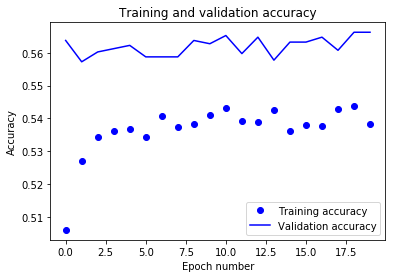

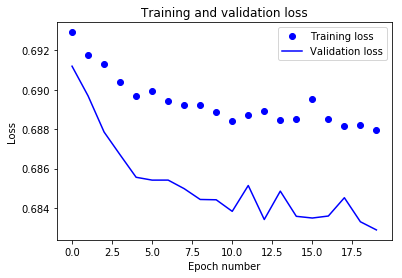

In [55]:
accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.show()

From the graph, we observe that the loss is decreasing per epoch with a few variations after the 10th epoch. The accuracy is also observed to be increasing but at a steady rate. The reason for these  issues may be as a result of the number samples passed to the model and also the number of epochs required to learn on such a dataset. The data preparation phased could have also played a role on the performance of the model

### Evaluation 

We now use our trained model to generate predictions on new data.

In [56]:
predictions = model.predict(x_test)
predicted_label = y_test[np.argmax(predictions[10])]
print("File ->", x_test[10], "Predicted label: " ,predicted_label)

File -> [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] Predicted label:  1


In [59]:
 x_test[10][0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [58]:
test_text.loc[10,'text']

'didanyonenotice?:forallthesylvianfanswhoreviewed:didanyonenoticethaton"ahistoryofholes"thatdavidsylvianwroteoneofhisbestlyrics?thebeatsandtherhythmdropouttemporarilyanddavidsings:wheniwasaboy/andimademistakes/iwashumiliated/tilliknewmyplace.snowbornesorrowisaverygoodalbum.itmayrequireonetolistentoitafewtimesandtorememberthatdavidhasanadventurousspirit.thereisafeelingofcompletenesswhenlisteningtoarecordingartistwhoshareswithyouwhatyouwantandneed.'

In [60]:
test_label.loc[10,'label']

1

From the result above we observe that the model is performing quite well by classifying the text above as 1. This however is just one sample out of our data and cannot be used for generalization purposes.

### Deployment 

Observation from the model indicate that it needs to be well trained before it is released for real world data. In view of this,the project hasn't yet been deeployed.

### Conclusion

I observe from the results above that better loss and accuracy values could be achieved if the network is fed with more data. We observe from the graphs that the loss is decreasing and the accuracy is increasing for both train and validation data. This is a good indicator of the model's perfomance and it's possible potential when more data is fed into it.<br> Also, we observe the time it took to train the model, which calls for the need of some form of optimization. <br>
This project helped me gain knowledge in Deep Learning Concepts and how to apply them on real world projects. Due to limitations of my PC (Macbook Pro 8GB RAM),I couldn't handle heavy data sets. I am looking forward to improving the entire performance of the model in order to achieve a high accuracy value of __90%__ as compared to the current __54.24%__ that the model is currently giving.